<a href="https://colab.research.google.com/github/caplove/DX_team_4_repo/blob/main/Team_4_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **데이터 가져오기**

---



In [2]:
!git clone https://github.com/caplove/DX_team_4_repo.git

#과제 설명
from IPython.display import Image
#Image('./image/image_01.png',width=800,height=600)
import sys
sys.path.append('/content/DX_team_4_repo')

Cloning into 'DX_team_4_repo'...
remote: Enumerating objects: 483, done.
remote: Counting objects: 100% (483/483), done.
remote: Compressing objects: 100% (463/463), done.
remote: Total 483 (delta 255), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (483/483), 24.44 MiB | 6.39 MiB/s, done.
Resolving deltas: 100% (255/255), done.


# 모듈과 함수 불러오기


In [66]:
"""모듈 / 함수 불러오기 """
from augment_import2 import augment2
from extractor_import import extractor
#from models_import import my_models
from models_import2 import my_models

from data_import import import_data_from_folder
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.svm import OneClassSVM
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# 데이터 불러오기

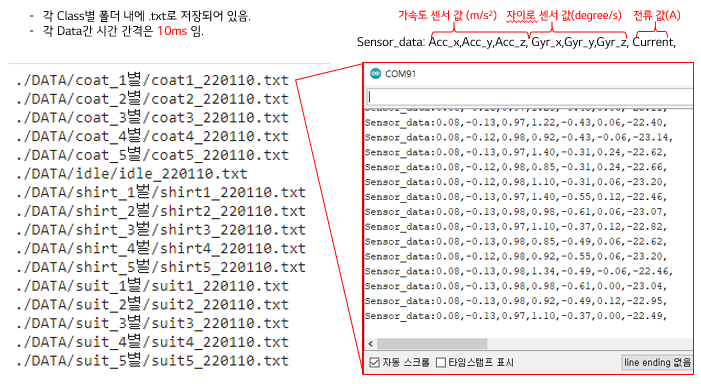

In [44]:
"""시계열 데이터 import"""
# 훈련 / 검증 데이터 : Data
# 테스트 데이터 : Data_test

FOLDER_NAME = "/DX_team_4_repo/Data"
x,y = import_data_from_folder(FOLDER_NAME)
print(x.shape,y.shape)

TEST_FOLDER_NAME = "/DX_team_4_repo/Data_test"
test_x,test_y = import_data_from_folder(TEST_FOLDER_NAME)
print(test_x.shape,test_y.shape)

""" 비어있는 데이터프레임 만들기"""
features_all = pd.DataFrame()
# jittering / MagWarp / Scaling / Combination
x_in_jittering = pd.DataFrame()
x_in_MagWarp = pd.DataFrame()
x_in_Scaling = pd.DataFrame()
x_in_Combination = pd.DataFrame()

.//DX_team_4_repo/Data//shirt_2.txt
.//DX_team_4_repo/Data//suit_4.txt
.//DX_team_4_repo/Data//suit_2.txt
.//DX_team_4_repo/Data//coat_1.txt
.//DX_team_4_repo/Data//coat_4.txt
.//DX_team_4_repo/Data//shirt_3.txt
.//DX_team_4_repo/Data//suit_5.txt
.//DX_team_4_repo/Data//suit_1.txt
.//DX_team_4_repo/Data//idle.txt
.//DX_team_4_repo/Data//coat_2.txt
.//DX_team_4_repo/Data//coat_5.txt
.//DX_team_4_repo/Data//coat_3.txt
.//DX_team_4_repo/Data//suit_3.txt
.//DX_team_4_repo/Data//shirt_1.txt
.//DX_team_4_repo/Data//shirt_4.txt
.//DX_team_4_repo/Data//shirt_5.txt
(274582, 7) (274582,)
.//DX_team_4_repo/Data_test/coat_4/coat_4.txt
.//DX_team_4_repo/Data_test/suit_2/suit_2.txt
.//DX_team_4_repo/Data_test/suit_1/suit_1.txt
.//DX_team_4_repo/Data_test/suit_5/suit_5.txt
.//DX_team_4_repo/Data_test/coat_1/coat_1.txt
.//DX_team_4_repo/Data_test/coat_3/coat_3.txt
.//DX_team_4_repo/Data_test/shirt_4/shirt_4.txt
.//DX_team_4_repo/Data_test/coat_5/coat_5.txt
.//DX_team_4_repo/Data_test/idle/idle.txt
.//

In [12]:
"""flag"""
# 별도의 test data(Data_test폴더) 사용여부 결정  
external_test_data_use = 1  # 0 : Data 폴더에서 8:1:1로 split사용,   1:Data_test폴더의 데이터 사용 

# 그래프/결과값 보이기
log_en = 0   # 0 : 결과만 보임,  1 : 중간 과정 보임.


In [50]:
# xy_train = pd.concat([x,y],axis=1)
# xy_test = pd.concat([test_x,test_y],axis=1)
# xy_train.head()

,accx,accy,accz,gyrx,gyry,gyrz,current,CLASS
0,0.01,0.07,1.03,-0.55,1.04,-0.98,0.81,shirt_2
1,0.03,-0.05,0.94,4.46,0.73,-1.89,0.04,shirt_2
2,0.02,-0.02,0.95,0.31,0.79,-1.71,-0.09,shirt_2
3,-0.01,0.05,1.06,-3.54,1.71,-1.40,-0.48,shirt_2
4,0.02,-0.05,0.98,1.89,1.10,-1.53,-0.41,shirt_2


# 데이터 정규화

In [67]:
# train 데이터를 기반으로 train/test 데이터에 대하여 standard scaling 적용 (평균 0, 분산 1) 
scaler = StandardScaler()
scaler = scaler.fit(x)

In [68]:
# scaler 처리하면, 데이터프레임 풀려서, pd로 다시 데이터프레임화.
X_train_scaled = pd.DataFrame(scaler.transform(x), 
                              columns=x.columns, 
                              index=x.index)
X_test_scaled = pd.DataFrame(scaler.transform(test_x), 
                             columns=test_x.columns, 
                             index=test_x.index)

In [69]:
xy_train = pd.concat([X_train_scaled,y],axis=1)
xy_test = pd.concat([X_test_scaled,test_y],axis=1)
xy_train.head()

,accx,accy,accz,gyrx,gyry,gyrz,current,CLASS
0,0.563201,2.001637,0.520587,-0.559160,-0.126804,1.737533,1.170415,shirt_2
1,1.666419,-1.404256,-0.984585,2.883175,-1.851240,-2.996189,-0.072495,shirt_2
2,1.114810,-0.552783,-0.817343,0.031740,-1.517478,-2.059848,-0.282337,shirt_2
3,-0.540018,1.433988,1.022311,-2.613568,3.600203,-0.447262,-0.911863,shirt_2
4,1.114810,-1.404256,-0.315620,1.117346,0.206958,-1.123508,-0.798871,shirt_2


# 시계열데이터 탐색 (분포)

(10673, 8) (4199, 8) (14872, 8)
(10833, 8) (7259, 8) (18092, 8)
(10385, 8) (6407, 8) (16792, 8)
(10479, 8) (7722, 8) (18201, 8)
(18961, 8) (7647, 8) (26608, 8)
(21561, 8) (10343, 8) (31904, 8)
(29200, 8) (6002, 8) (35202, 8)
(17994, 8) (6530, 8) (24524, 8)
(15494, 8) (6458, 8) (21952, 8)
(18285, 8) (3836, 8) (22121, 8)
(16657, 8) (4204, 8) (20861, 8)


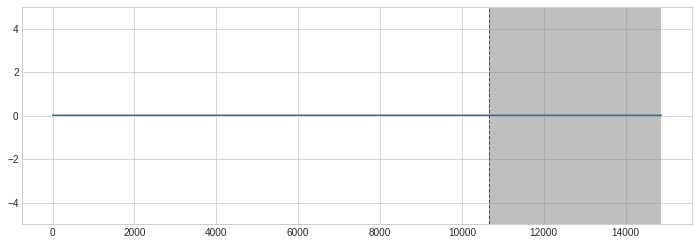

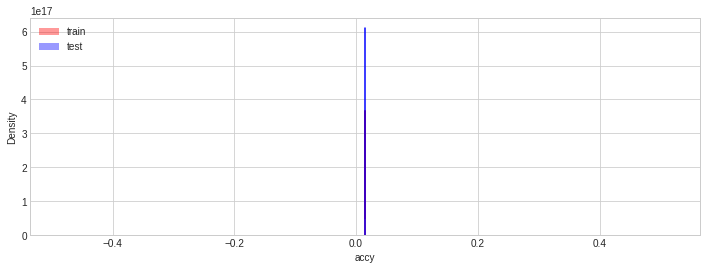

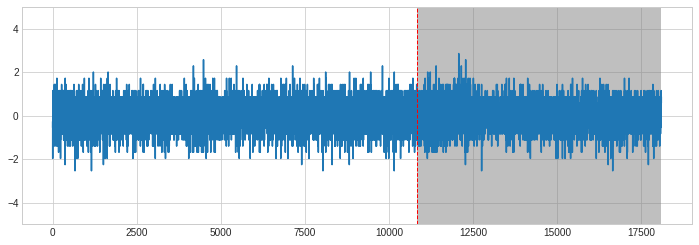

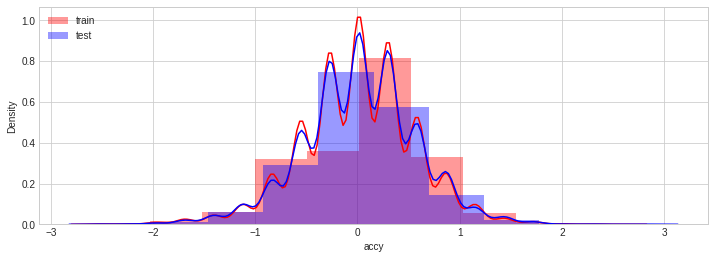

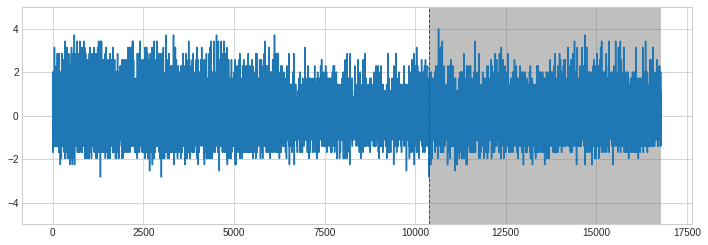

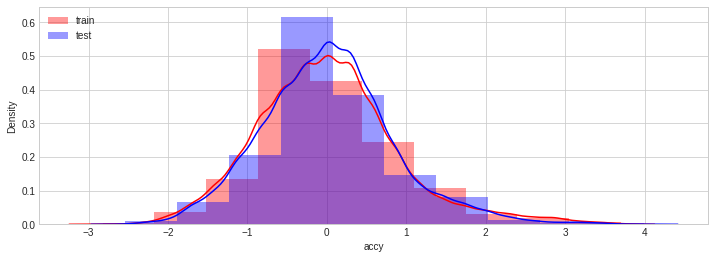

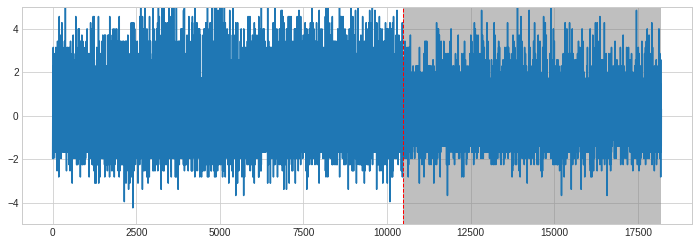

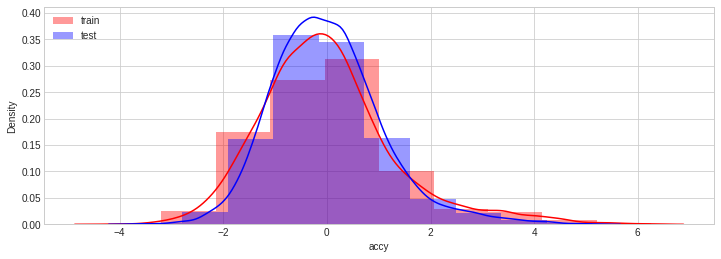

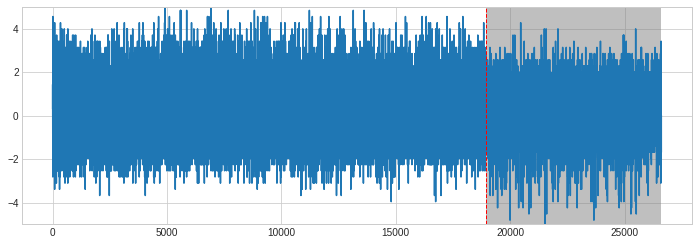

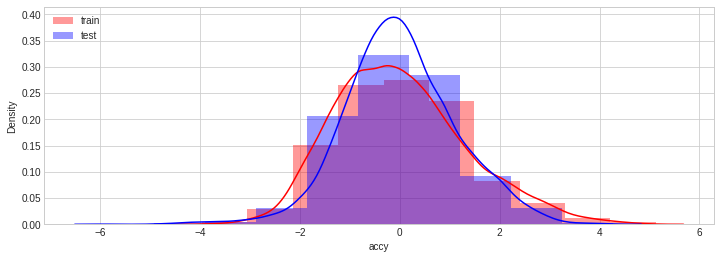

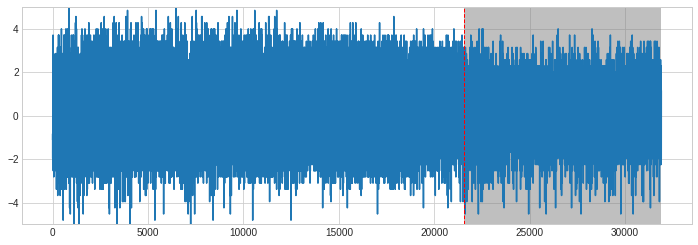

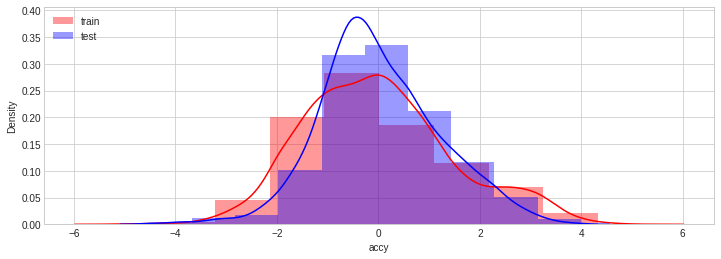

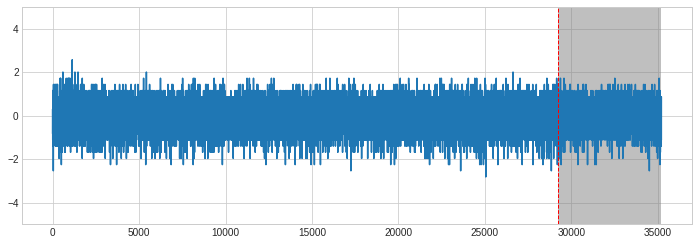

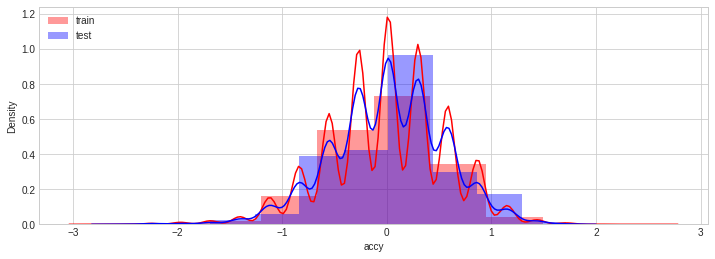

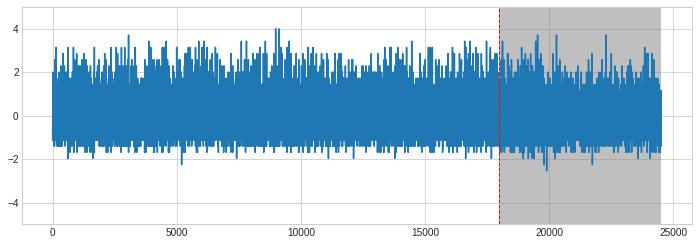

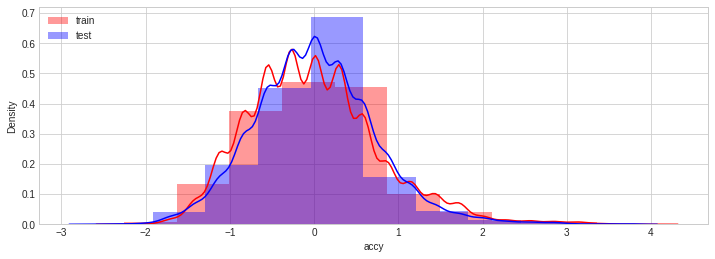

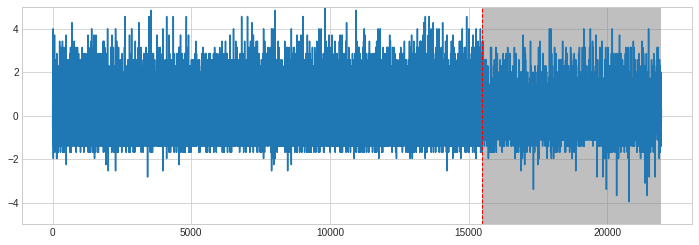

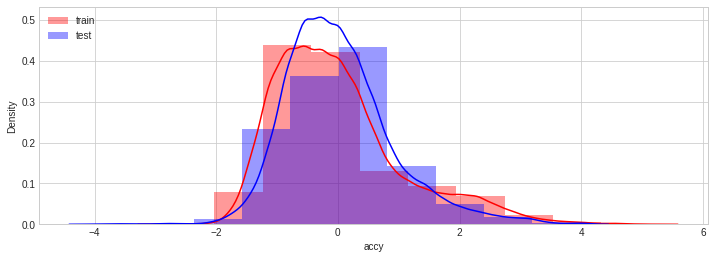

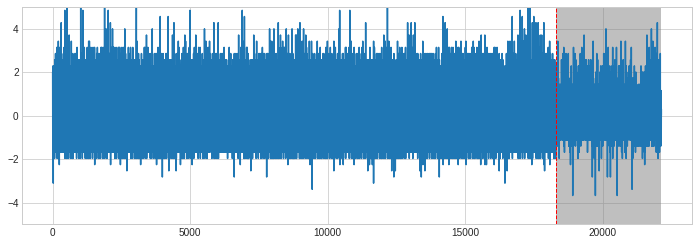

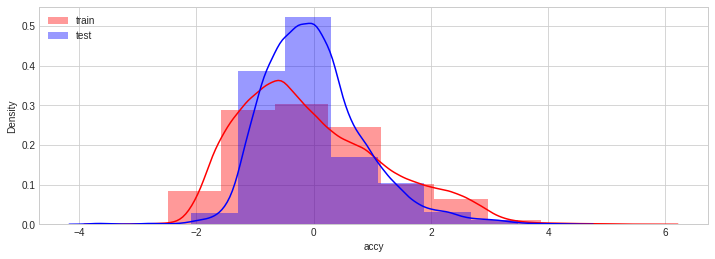

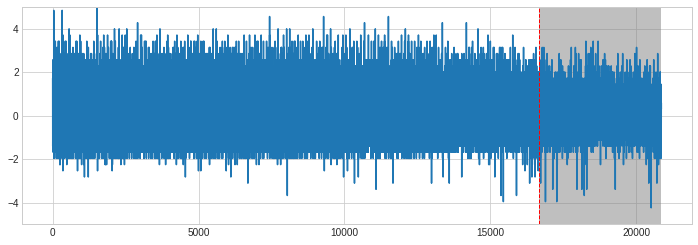

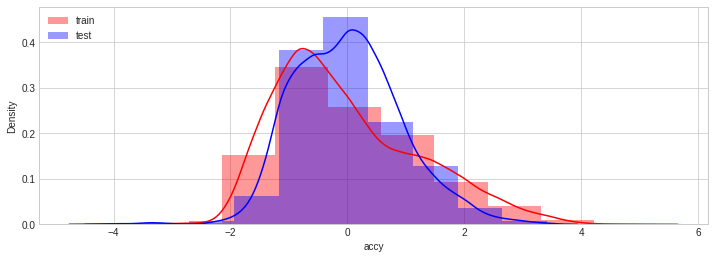

In [107]:
class_list=np.array(['idle','shirt_1','shirt_2','shirt_3',
            'shirt_4','shirt_5','coat_1','coat_2','coat_3','coat_4','coat_5'])

# class_list=np.array(['idle', 'shirt_1'])


for ii in class_list:
  idx_reference = xy_train['CLASS'] == ii
  idx_contrast  = xy_test ['CLASS'] == ii

  """Class별 Ref/Con 데이터"""
  train_data = xy_train[idx_reference]
  test_data = xy_test[idx_contrast]

  train_test_data = pd.concat([train_data,test_data],axis=0,ignore_index=True)
  print(train_data.shape,test_data.shape,train_test_data.shape)

  plt.figure(figsize=[12,4])
  # 클래스별 시계열 데이터 확인    2월 | 3월
  plt.plot(train_test_data.iloc[:,1])
  # plt.axhline(CL,color ='r',linewidth=1,linestyle='--')
  plt.axvline(x=train_data.shape[0],color ='r',linewidth=1,linestyle='--')
  plt.axvspan(train_data.shape[0], train_test_data.shape[0], facecolor='gray', alpha=0.5)
  plt.ylim([-5,5])

  # 클래스별 분포 확인
  comp1 = train_data.iloc[:,1]
  comp2 =  test_data.iloc[:,1]
  plt.figure(figsize=[12,4])
  sns.distplot(comp1, bins=10, color='r',label='train')
  sns.distplot(comp2, bins=10, color='b',label='test')
  plt.legend(loc='upper left')

In [109]:
# # 클래스별 시계열 데이터 확인    2월 | 3월
# plt.plot(figsize = (24, 6))
# plt.plot(train_test_data.iloc[:,1])
# # plt.axhline(CL,color ='r',linewidth=1,linestyle='--')
# plt.axvline(x=train_data.shape[0],color ='r',linewidth=1,linestyle='--')
# plt.axvspan(train_data.shape[0], train_test_data.shape[0], facecolor='gray', alpha=0.5)

In [110]:
# # 방법1
# comp1 = train_data.iloc[:,1]
# comp2 =  test_data.iloc[:,1]

# sns.distplot(comp1, bins=20, color='r')
# sns.distplot(comp2, bins=20, color='b')

In [108]:
# # 방법2
# bins = np.linspace(-5, 5, 30)

# plt.hist(train_data.iloc[:,1], bins, alpha = 0.5, label='train')
# plt.hist(test_data.iloc[:,1], bins, alpha = 0.5, label='test')
# plt.legend(loc='upper left')

# 특징 데이터 탐색 (MFCC)
> - mfcc 변환 (accx,accy,accz,current 각 13개 특징치)

In [13]:
# Reference 데이터셑 특징추출
dataset_list = [x]                                                               
features_train = extractor(x,y,dataset_list,log_en)


# Contrast 데이터셑 특징추출
dataset_list = [test_x]
features_test = extractor(test_x,test_y,dataset_list,log_en)
print("status: Features 추출 완료")
print(features_train.shape,features_test.shape)

status: Features 추출 완료
(662, 53) (192, 53)


In [14]:
features_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,class
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-340.208940,9.999247,9.996988,9.993224,9.987955,9.981181,9.972905,9.963126,9.951847,9.939070,9.924795,9.909026,9.891765,201.391341,0.925284,-4.041210,7.387525,1.751451,0.090655,0.394997,1.490920,2.452048,-4.733238,3.687767,0.847616,3.709894,idle
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-340.208940,9.999247,9.996988,9.993224,9.987955,9.981181,9.972905,9.963126,9.951847,9.939070,9.924795,9.909026,9.891765,273.739337,2.944957,0.142026,-0.573331,1.535497,-3.454344,-7.073645,-2.805138,-1.876212,-2.081281,-6.421273,1.218584,0.310433,idle
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-340.208940,9.999247,9.996988,9.993224,9.987955,9.981181,9.972905,9.963126,9.951847,9.939070,9.924795,9.909026,9.891765,203.218297,1.315889,5.813116,-5.363791,-6.252804,-2.776524,-2.444918,0.976442,3.285535,-0.567978,-2.320336,-0.079556,5.451989,idle
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-162.113785,8.161720,8.000247,8.156804,8.002595,8.146974,7.989094,8.132237,7.968228,8.112601,7.949393,8.088079,7.923874,203.913445,1.792793,-1.025874,-3.227174,-7.178538,3.415736,-5.713125,-3.127864,1.936888,4.775039,-2.434643,3.841988,2.972255,idle
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-340.208940,9.999247,9.996988,9.993224,9.987955,9.981181,9.972905,9.963126,9.951847,9.939070,9.924795,9.909026,9.891765,203.336192,-5.578025,-3.158794,-1.916322,-3.194026,-7.659798,-5.715364,0.557323,6.521582,6.264885,-7.649926,3.726388,4.487350,idle


## RTC control chart 

> - 시계열데이터 --> Features 추출 (MFCC) accx,y,z,current
>  - Reference Data : 1차로 획득한 데이터셑 (1월데이터)
>  - Contrast Data :  2차로 획득한 데이터셑 (2월데이터)

In [15]:
''' 기본 모듈 및 분류 모듈'''
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [16]:
wsz=5   # window size (데이터 행의 개수 : mfcc 후의 데이터 행이 적음.)  
ntree=200  # 앙상블 개수
RTC_log_en = 0  # log 파일 보기 flag
# 모형 설계
RF=RandomForestClassifier(n_estimators = ntree, criterion = 'entropy', random_state=0 ,oob_score=True)

# 훈련용 Ref and Contrast label 생성
temp_y=np.array(["N","A"])
label_y=np.repeat(temp_y,[wsz,wsz],axis=0)
label_y


array(['N', 'N', 'N', 'N', 'N', 'A', 'A', 'A', 'A', 'A'], dtype='<U1')

### 훈련 / Test

idle (25, 53) (9, 53)
0.5
shirt_1 (26, 53) (17, 53)
0.5
shirt_2 (24, 53) (15, 53)
0.6
shirt_3 (25, 53) (18, 53)
0.6
shirt_4 (46, 53) (18, 53)
0.7
shirt_5 (52, 53) (24, 53)
0.5049999999999997
coat_1 (72, 53) (14, 53)
0.7
coat_2 (43, 53) (15, 53)
0.5049999999999997
coat_3 (37, 53) (15, 53)
0.6
coat_4 (44, 53) (8, 53)
0.6
coat_5 (40, 53) (9, 53)
0.6


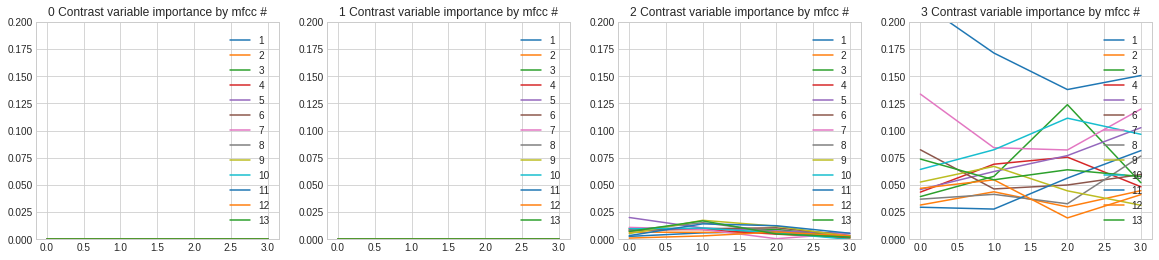

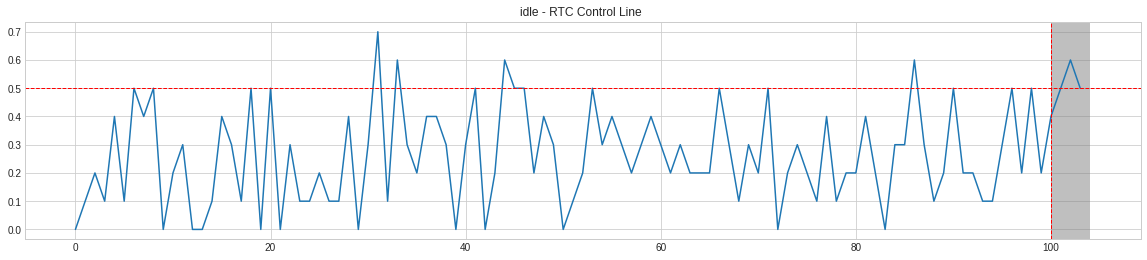

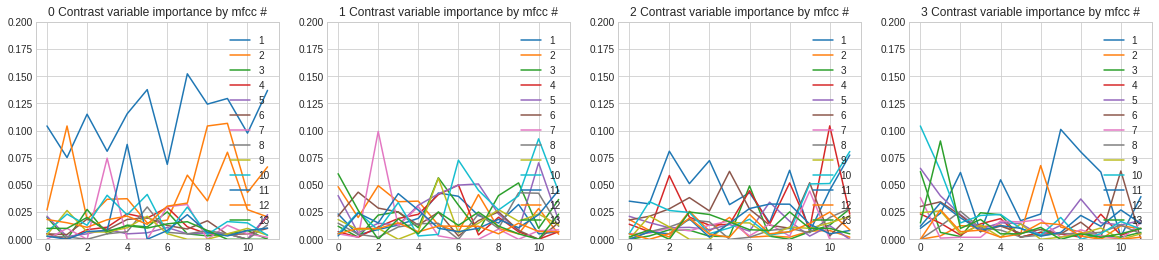

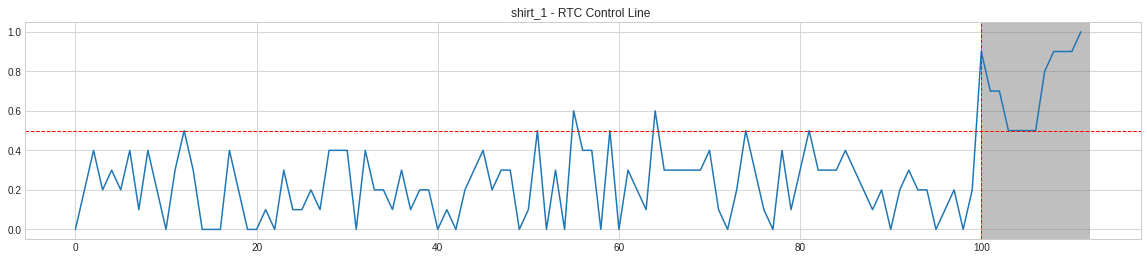

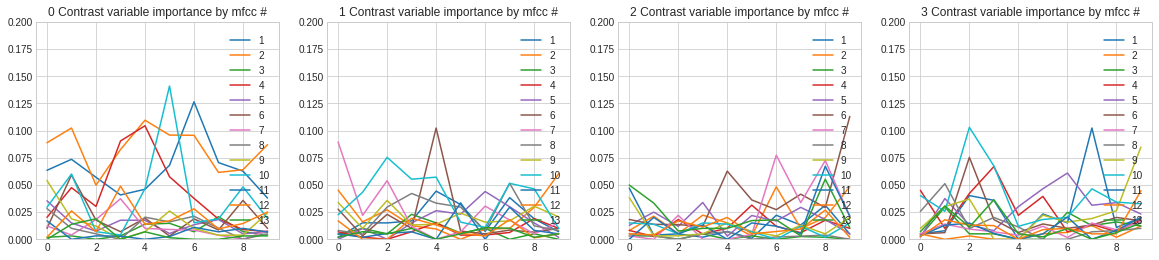

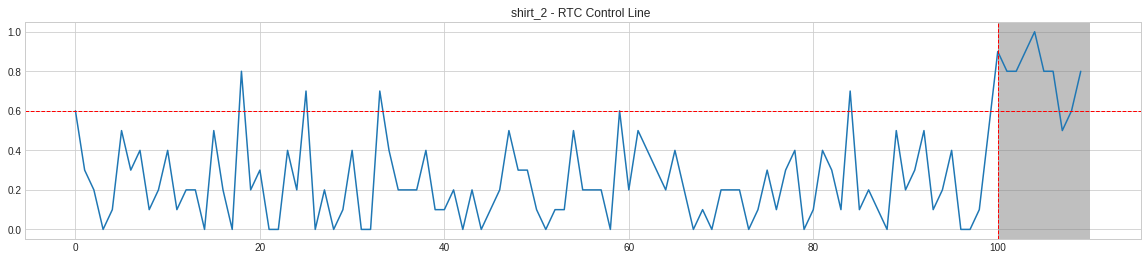

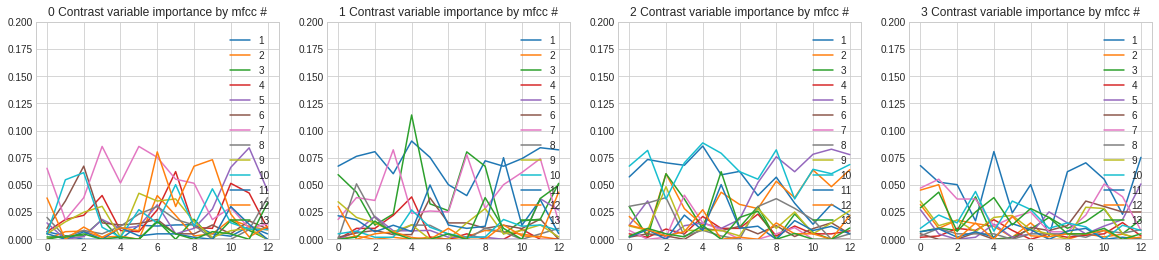

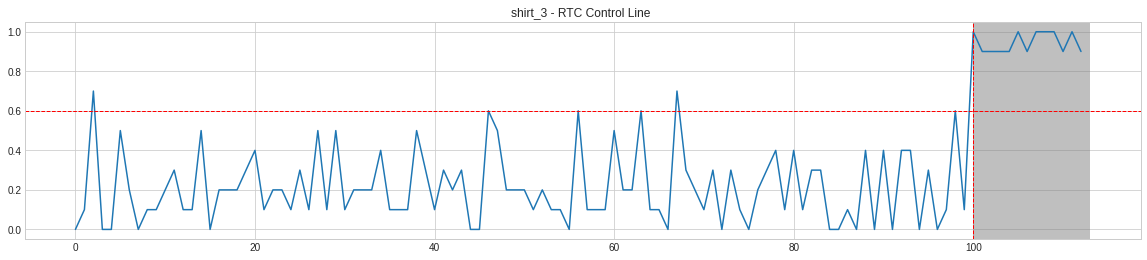

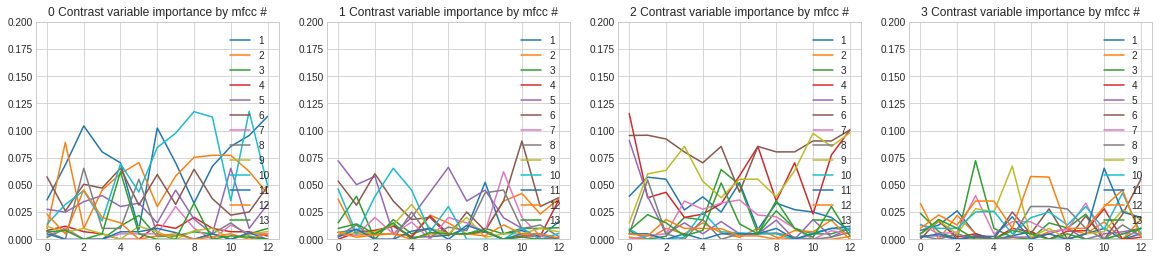

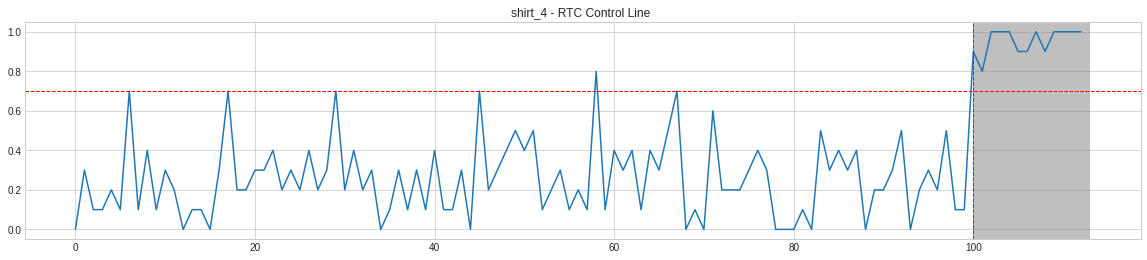

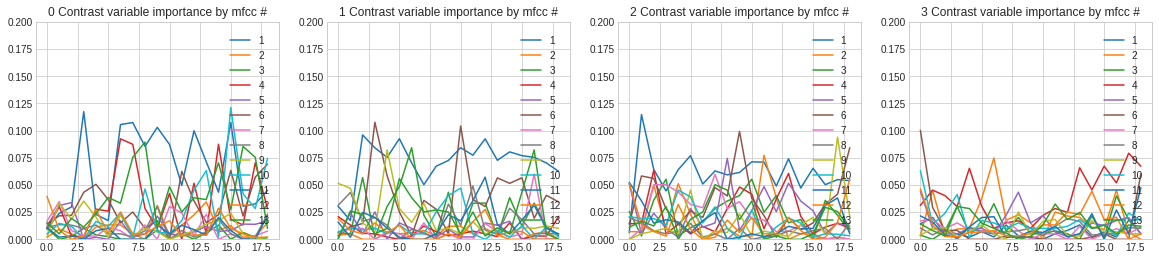

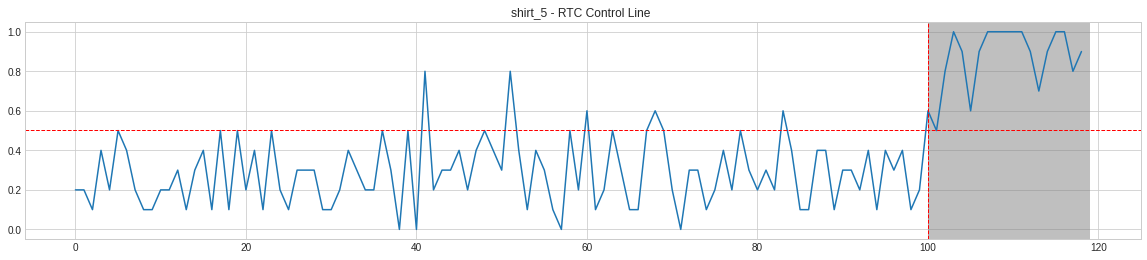

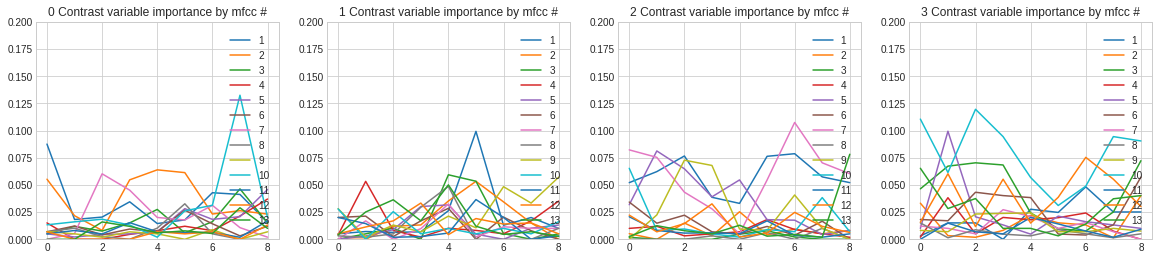

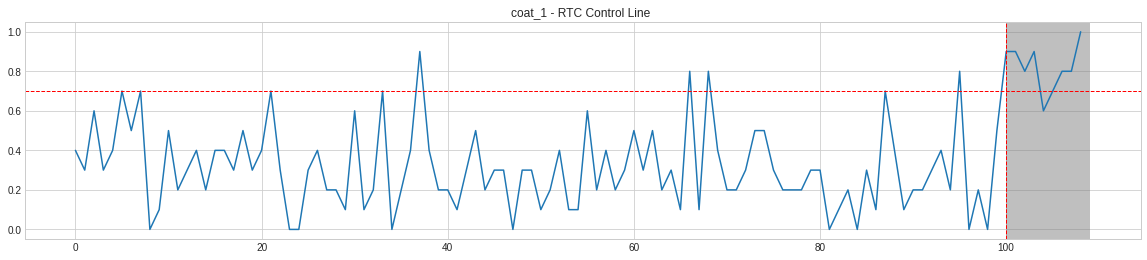

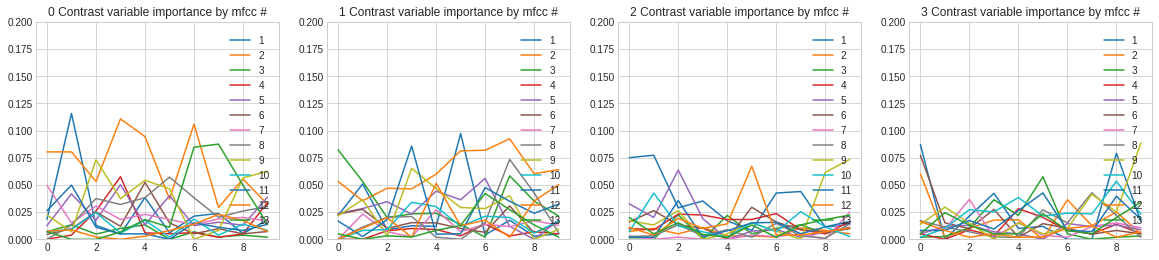

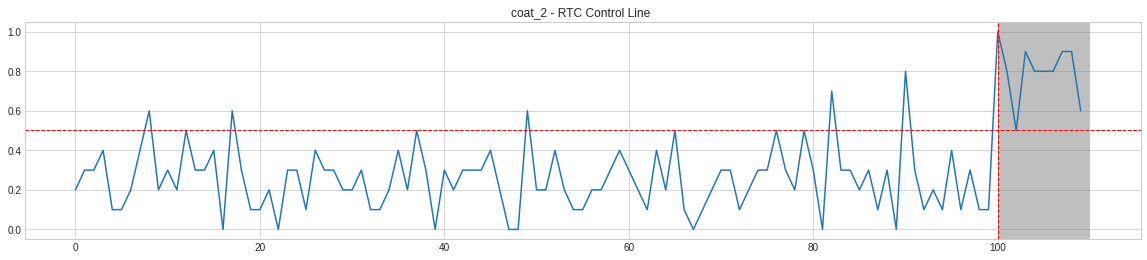

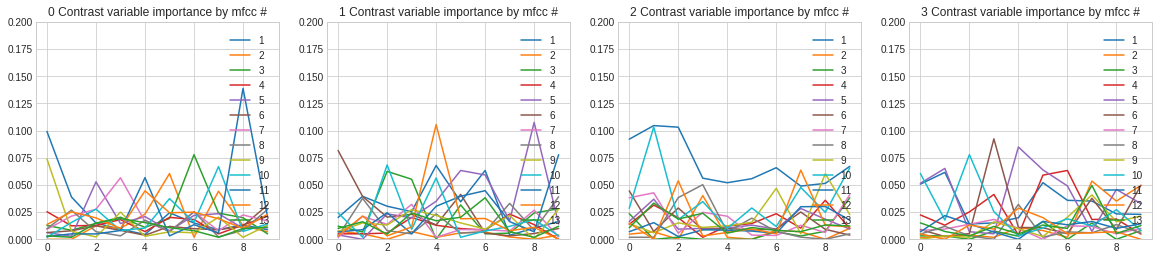

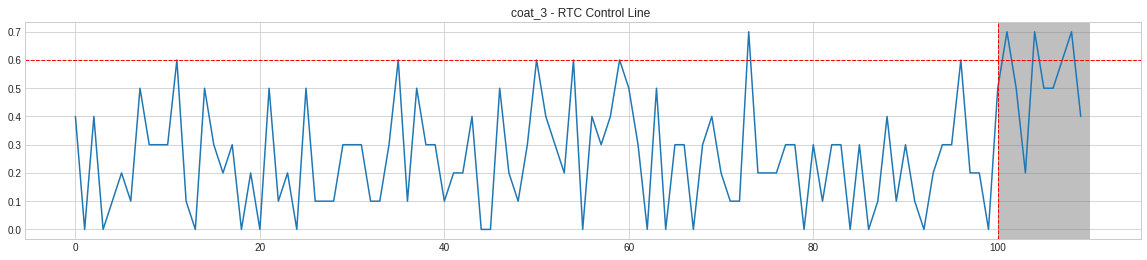

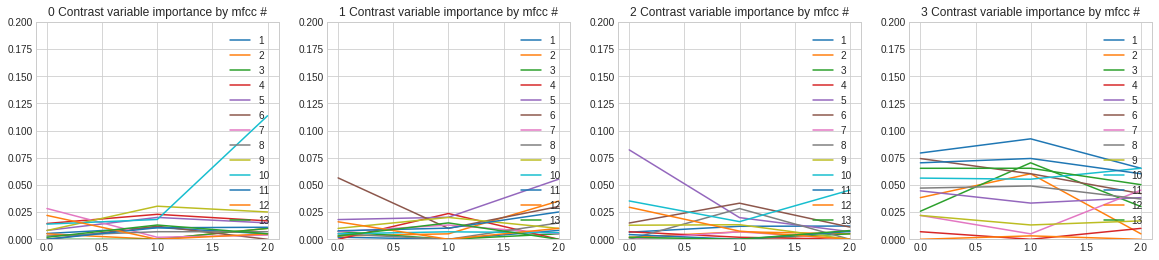

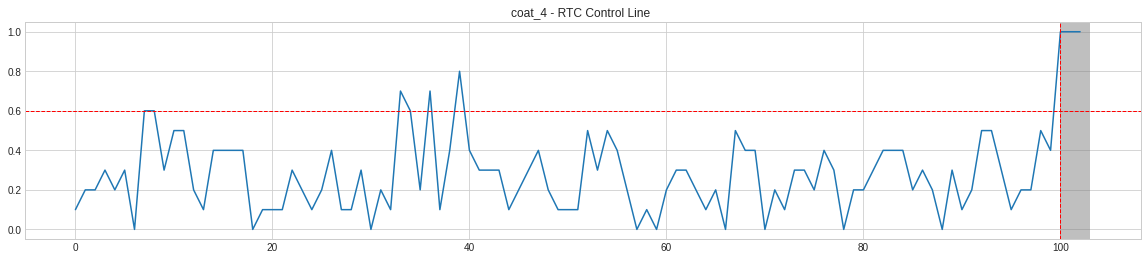

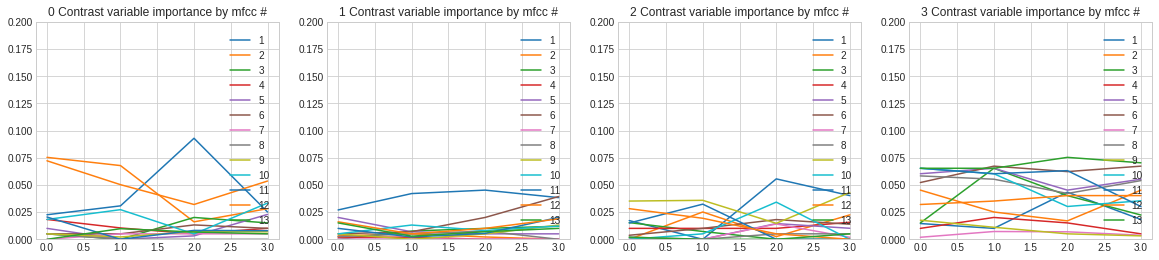

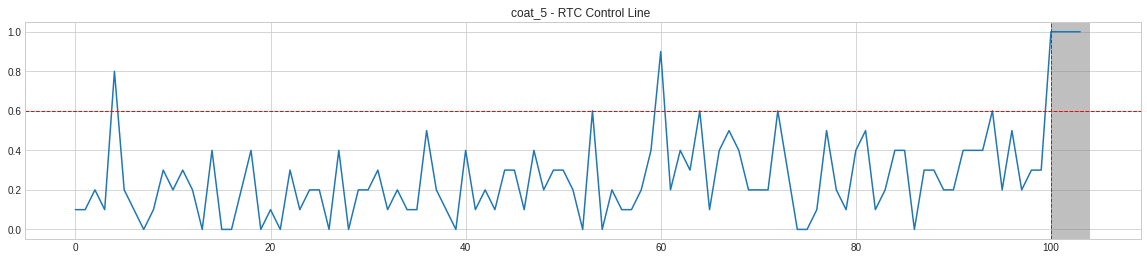

In [21]:
class_list=np.array(['idle','shirt_1','shirt_2','shirt_3',
            'shirt_4','shirt_5','coat_1','coat_2','coat_3','coat_4','coat_5'])

# class_list=np.array(['idle', 'shirt_1'])


for ii in class_list:
  idx_reference = features_train['class'] == ii
  idx_contrast = features_test['class'] == ii

  """Class별 Ref/Con 데이터"""
  train_data = features_train[idx_reference]
  test_data = features_test[idx_contrast]

  # features_train = features_train['class'] == 'shirt_1'
  X_train = train_data.iloc[:, :features_train.shape[1]].values   # array 화

  # features_test = features_test['class'] == 'shirt_1'
  X_test = test_data.iloc[:, :features_train.shape[1]].values   # array 화

  print(ii,X_train.shape,X_test.shape)

  """Random Forest 모형"""
  RF=RandomForestClassifier(n_estimators = ntree, criterion = 'entropy', random_state=0 ,oob_score=True)
  prob_CL=[]
  vi_tr=[]

  """훈련"""
  # 정상 데이터만을 가지고 렌덤으로 셔플하여
  for i in range(100):   # 100개 반복해서 만듬
      idx_ref = rd.sample(range(X_train.shape[0]),wsz)    # X_train.shape = (26,52) --> 26개의 row 중에 10개를 랜덤발췌--> ref 만듬
      idx_con = rd.sample(range(X_train.shape[0]),wsz)    # X_train.shape = (26,52) --> 26개의 row 중에 10개를 랜덤발췌--> con 만듬
      # idx는 예시로 [1,26,3,7, ..., 11] 값
      
      tempRef = train_data.iloc[idx_ref,0:X_train.shape[1]-1]
      tempCon = train_data.iloc[idx_con,0:X_train.shape[1]-1]
      tempData = pd.concat([tempRef,tempCon])              # tempData.shape = (20,10)   
      RF.fit(tempData,label_y)    # label_y = array(['N', 'N', 'N', 'N', ...,'A','A',
      prob_CL.append(RF.oob_score_)
      vi_tr.append(RF.feature_importances_)


  if RTC_log_en:
    # 동질의 sample 데이터 (shirt1)에서의 분류 정확도
    # 동질이면 분류가 안되어, accuracy가 낮아야 정상임.높다면 wsz를 변경해볼것
    plt.figure(figsize=[10,4])
    plt.plot(prob_CL)   # 분류기 분류 정확도    
    plt.title(f'{ii} - RTC Reference prob. ')
    plt.ylim([0,1])

    # 주요 인자 확률
    plt.figure(figsize=[10,4])
    plt.plot(vi_tr)
    plt.title(f'{ii} - RTC variable importance')

  # CL(Control Limit) 생성 95%
  CL=np.quantile(prob_CL,0.95)
  print(CL)

  if RTC_log_en:
    plt.figure(figsize=[10,4])
    plt.plot(prob_CL,'ko')
    plt.title(f'{ii} - RTC Control Line ')



  """TEST """
  prob=[]  # 확률
  vi=[]    # 중요도
  for i in range(test_data.shape[0]-wsz):   # test 할 자료 갯수 - wsz 
      # 훈련 set (shirt1_26개)에서 무작위로 10개 뽑아서, ref를 만든다.
      idx_ref = rd.sample(range(X_train.shape[0]),wsz)   # (26,52)
      #idx_con = rd.sample(range(X_train.shape[0]),wsz)
      tempRef = train_data.iloc[idx_ref,0:52]

      # Con은 test 할 데이터에서 순차적으로 10개 뽑아서 만든다.
      tempCon = test_data.iloc[(i):(i+wsz),0:52]
      tempData = pd.concat([tempRef,tempCon])
      RF.fit(tempData,label_y)
      prob.append(RF.oob_score_)
      vi.append(RF.feature_importances_)

  if RTC_log_en:
    # 관리도 결과 plot
    plt.figure(figsize=(4,4))
    plt.plot(prob)
    plt.axhline(CL,color ='r',linewidth=1,linestyle='--')
    plt.title(f'{ii} - Contrast Prob')
    plt.ylim([0,1])

  # 변수별 feature importance 확인
  vi_arr = np.array(vi)
  plt.figure(figsize=(20,4))

  for jj in range(4):
    plt.subplot(1,4,jj+1)
    plt.plot(vi_arr[:,jj*13:(jj+1)*13])
    plt.ylim([0,0.2])
    plt.legend([1,2,3,4,5,6,7,8,9,10,11,12,13],loc='right')
    plt.title(f'{jj} Contrast variable importance by mfcc #')

  # Class별 결과
  plt.figure(figsize=(20,4))
  Ref_plot = pd.DataFrame(prob_CL)
  Con_plot = pd.DataFrame(prob)
  all = pd.concat([Ref_plot,Con_plot],axis=0,ignore_index=True)
  plt.plot(all)
  plt.axhline(CL,color ='r',linewidth=1,linestyle='--')
  plt.axvline(x=Ref_plot.shape[0],color ='r',linewidth=1,linestyle='--')
  plt.axvspan(Ref_plot.shape[0], all.shape[0], facecolor='gray', alpha=0.5)
  plt.title(f'{ii} - RTC Control Line ')
